In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
train_data = pd.read_csv('fraudTrain.csv',nrows=10000)
test_data = pd.read_csv('fraudTest.csv',nrows=10000)


In [4]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
test_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [6]:
train_data.shape

(10000, 23)

In [10]:
X_train = train_data.drop(['is_fraud','trans_date_trans_time','merchant','category','first','last','street','gender','city','state','job','dob','trans_num'], axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop(['is_fraud','trans_date_trans_time','merchant','category','first','last','street','gender','city','state','job','dob','trans_num'], axis=1)
y_test = test_data['is_fraud']


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
lr_predictions = lr_model.predict(X_test_scaled)
lr_confusion_matrix = confusion_matrix(y_test,lr_predictions)
lr_classification_report = classification_report(y_test , lr_predictions)

print('logistic regression confusion matrix :\n', lr_confusion_matrix)
print('logistic regression classification matrix :\n', lr_classification_report)


logistic regression confusion matrix :
 [[9978    0]
 [  22    0]]
logistic regression classification matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\riyau\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyau\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\riyau\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [19]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
dt_predictions = dt_model.predict(X_test_scaled)
dt_confusion_matrix = confusion_matrix(y_test,dt_predictions)
dt_classification_report = classification_report(y_test , dt_predictions)

print('Decision Tree confusion matrix :\n', dt_confusion_matrix)
print('Decision Tree classification matrix :\n', dt_classification_report)

Decision Tree confusion matrix :
 [[9913   65]
 [  20    2]]
Decision Tree classification matrix :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9978
           1       0.03      0.09      0.04        22

    accuracy                           0.99     10000
   macro avg       0.51      0.54      0.52     10000
weighted avg       1.00      0.99      0.99     10000



In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [22]:
rf_predictions = rf_model.predict(X_test_scaled)
rf_confusion_matrix = confusion_matrix(y_test,rf_predictions)
rf_classification_report = classification_report(y_test , rf_predictions)

print('Random Forest confusion matrix :\n', rf_confusion_matrix)
print('Random Forest classification matrix :\n', rf_classification_report)

Random Forest confusion matrix :
 [[9976    2]
 [  22    0]]
Random Forest classification matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



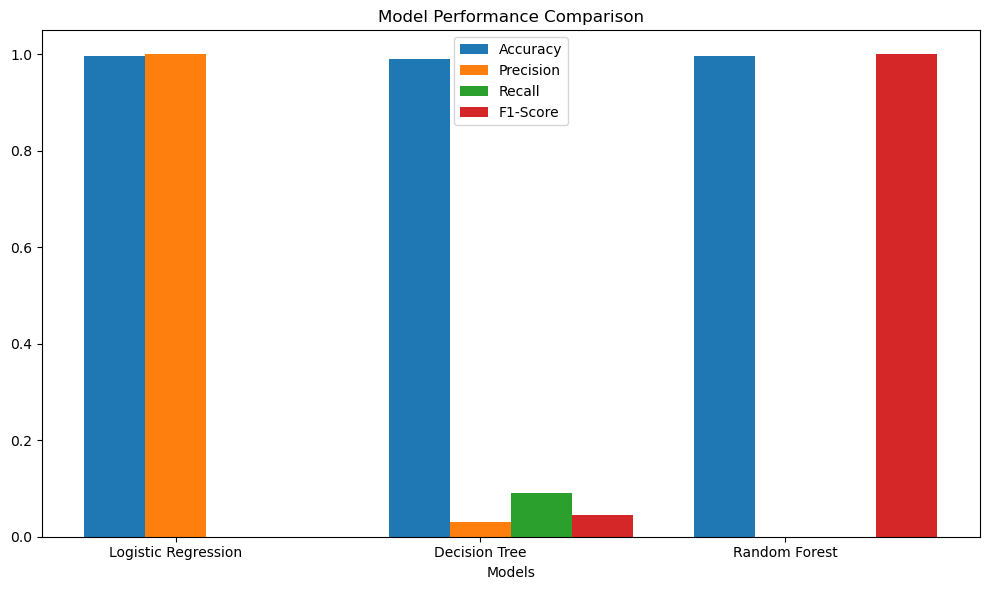

In [25]:
import matplotlib.pyplot as plt
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled,y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled,y_train)

models = [lr_model , dt_model,rf_model]
model_names =['Logistic Regression', 'Decision Tree','Random Forest']
metrics={'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

for model in models:
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test,predictions,output_dict=True,zero_division=1)
    metrics['Accuracy'].append(report['accuracy'])
    metrics['Precision'].append(report['1']['precision'])
    metrics['Recall'].append(report['1']['recall'])
    metrics['F1-Score'].append(report['1']['f1-score'])
    
fig , ax = plt.subplots(figsize=(10,6))
width = 0.2
x =  range(len(model_names))

for i, metric in enumerate(metrics.keys()):
    ax.bar([pos + width * i for pos in x] , metrics[metric],width = width,label=metric)
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(model_names)
ax.legend()
ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
plt.tight_layout()
plt.show()
    
    